## Tries

Jacob L. Fine

June 25th, 2024

Since many strings may have the same prefix, we may desire to come up with some way to store them that reduces redundnancy. For instance, since the strings 'computation', 'computer', and 'compute' all share the prefix 'comput', there may be some method that stores 'comput' and then the remaining characters, 'ation', 'er' and 'e'. 

This leads to the concept of a 'prefix tree', also referred to as a 'trie'. Tries group strings based on their prefix, such that each node corresponds to one letter in a given word, and paths from the root node to each leaf node constitute a complete word. To insert a new string into the trie, or to check if an existing string is preset, we keep checking if the prefix (which is dynamic in length) of the query word, or the word we would like to insert, is present in the graph. We can determine whether a query string is present in our trie using depth-first search (DFS), since we keep following a path from the root node to the leaf node(s) until we find our string. 

Tries may also be used in autocomplete, for instance, if we type 'comput' into our phone keyboard, we may be recommended possible words such as 'computer', 'compute' and 'computation', or more. Combining tries with probablistic modelling and/or machine learning can be used to make even more powerful recommendations, for instance, if we know which terms the user prefers. 

In bioinformatics, tries can be used to group DNA or RNA sequences with common prefixes, which can be relevant in genome and/or transcriptome assembly, given that both cases require the efficient storage and retrieval of large sets of sequences.

We will implement a trie below, for an arbitrary list of RNA sequences, and display the results as a graph.

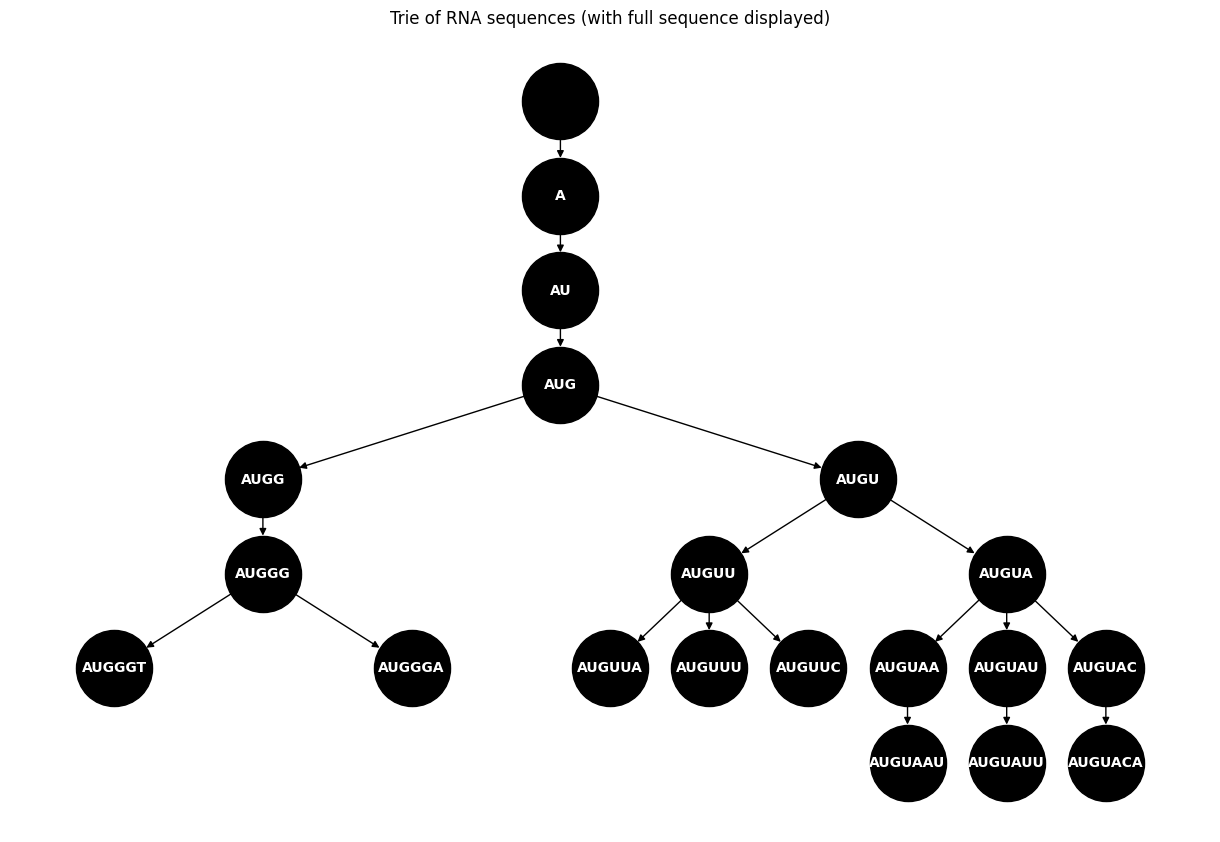

In [55]:
import networkx as nx
import matplotlib.pyplot as plt

# initializes the nodes, stores children of node as a dictionary. And contains a variable denoting whether it is or is not a leaf node.
# the .children dictionary will become a nested dictionary with the full trie.
class TrieNode:
    def __init__(self):
        self.children = {}
        self.is_leaf = False

# defines the Trie class to wrap nodes
class Trie:
    # initializes the tree's root as a node
    def __init__(self):
        self.root = TrieNode()
    # defines a method to insert new nodes based on the list of query sequences
    def insert(self, sequence):
        # the working node will start as the root
        node = self.root
        # for each character in the sequence
        for letter in sequence:
            # only when the character is not one the node's children (in which case, we would go down that path), we add a new child to the working node with that character
            if letter not in node.children:
                # we make the node's child for that character a node object
                node.children[letter] = TrieNode()
                # we then reset the working node to its child for that character. This means that when adding a new string, we will keep checking if the string contains prefixes that are already in the graph.
            node = node.children[letter]
        # when we finish executing the above code, our working node will become the leaf node, so we update its attribute accoridgly.
        node.is_leaf = True

    # this is a function to plot_trie the sequences
    def plot_trie(self):
        # we use the networkx package to initialize a (directed) graph object
        G = nx.DiGraph()
        
        # we add nodes and edges based on the trie we constructed, starting with the root node.
        def add_nodes_and_edges(node, parent_label=''):
            # we iterate through each character-child pair in the trie and label the nodes and edges accordingly
            for letter, child in node.children.items():
                # labelling the node, and adding it to the graph
                node_label = parent_label + letter
                G.add_node(node_label)
                # drawing an edge between the parent and each child
                G.add_edge(parent_label, node_label)
                add_nodes_and_edges(child, node_label)
        # calls the function to draw the graph
        add_nodes_and_edges(self.root)
        return G

# example sequences, each beginning with a start codon (AUG)
input_sequences = [
    'AUGGGT',
    'AUGGGA',
    'AUGUUA',
    'AUGUUU',
    'AUGUUC',
    'AUGUAAU',
    'AUGUAUU',
    'AUGUACA'
]

trie = Trie()
# inserts each seqeunce into the trie
for sequence in input_sequences:
    trie.insert(sequence)

# plot_tries the trie
G = trie.plot_trie()

# A function to calculate positions for nodes in a hierarchical layout
def set_hierarchical_position(G, root=None, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5):
    # for a given node, return a dictionary of node positions based on the helper function below.
    position = _set_hierarchical_position(G, root, width, vert_gap, vert_loc, xcenter)
    return position

# a helped function that will loop through all the nodes in the graph
def _set_hierarchical_position(G, root, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5, position=None, parent=None):
    # intialize a positions dictionary
    if position is None:
        position = {root: (xcenter, vert_loc)}
    else:
        # Update the position of the root node
        position[root] = (xcenter, vert_loc)

    # Get neighbors of the root node
    neighbors = list(G.neighbors(root))
    
    # Uses recursion to calculate the positions of each neighbor to each other to optimize the layout
    if len(neighbors) != 0:
        # goes through the nieghbors of a given node, and calcualtes its neighbors
        dx = width / len(neighbors)
        nextx = xcenter - width/2 - dx/2
        
        for neighbor in neighbors:
            nextx += dx
            # Uses recursion to calculate the positions of each neighbor to each other to optimize the layout
            position = _set_hierarchical_position(G, neighbor, width=dx, vert_gap=vert_gap, vert_loc=vert_loc-vert_gap, xcenter=nextx, position=position, parent=root)
    
    return position


# plots the graph
plt.figure(figsize=(12, 8))
position = set_hierarchical_position(G, '')
nx.draw(G, position, with_labels=True, arrows=True, node_size=3000, node_color='black', font_size=10, font_color = 'white', font_weight='bold', edge_color='black')
plt.title('Trie of RNA sequences (with full sequence displayed)')
plt.show()


We have successfully created a trie of the set of RNA sequences from the list. We have displayed the full RNA sequence at each node, even though the true trie only stores each letter.